# Elements of Convex Optimization 2025 - Homework 1

### Solution author: <Mikołaj Nowak, 151813>

The purpose of this notebook is to implement methods for univariate optimization. The notebook will use helper functions to create and draw functions (in [eco_hw1_helpers.py](eco_hw1_helpers.py) file, but there is no need to look at it).

This exercise requires **numpy**, **matplotlib** and **[autograd](https://github.com/HIPS/autograd)** libraries:

In [1]:
# a line making the graphs show up in the notebook
# you can safely ignore it (but run it!).
%matplotlib inline

# Some important imports:
from eco_hw1_helpers import Function
import numpy as np

# Bogus search

In [2]:
# Sample implementation of algorithm that assumes that minimum is in the middle of the domain or at 0 and actually doesn't
# search very extensively.
# as arguments it takes the function object and number of function calls to perform
# It returns a tuple with all visited points in order of visit(for plotting purposes) and the minimizer it "found"
def bogus_search(function: Function, n: int):
    a, b = function.domain
    m = (a + b) / 2
    bogus_visited_points_in_order = [m]
    m_value = function.evaluate(m)
    bogus_minimizer = m
    if a <= 0 <= b and n > 1:
        bogus_visited_points_in_order.append(0)
        if m_value > function.evaluate(0):
            bogus_minimizer = 0

    return bogus_visited_points_in_order, bogus_minimizer

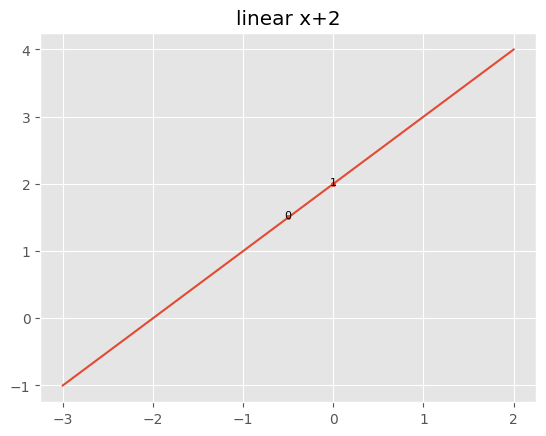

In [3]:
# To test your code first create some function, e.g. a linear function:

f = Function(lambda x: x+2,
             domain=(-3,2),
             name="linear x+2")

# Run the solution:
max_steps = 10
points, solution = bogus_search(f, max_steps)

# The function will plot itself and all points that where searched in order of visit
# By default it will annotate first and last 10 points.
f.plot(points=points)


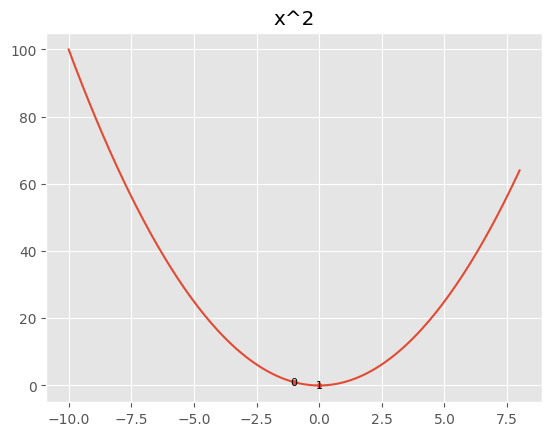

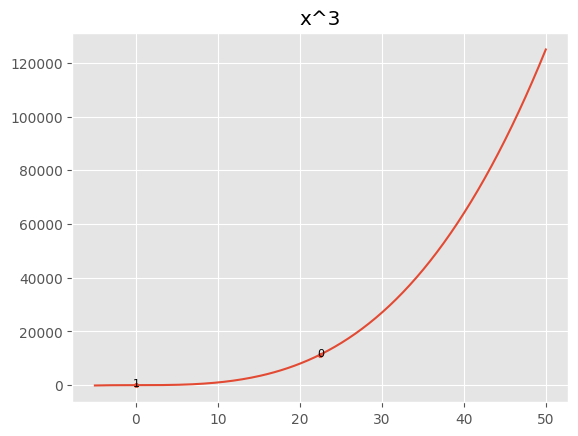

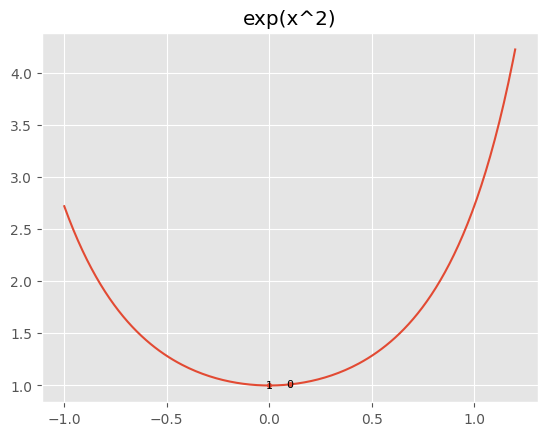

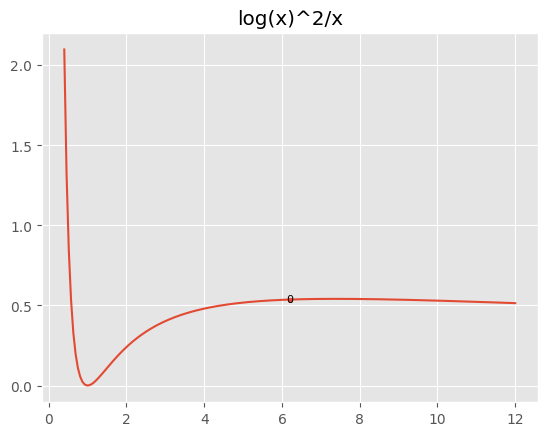

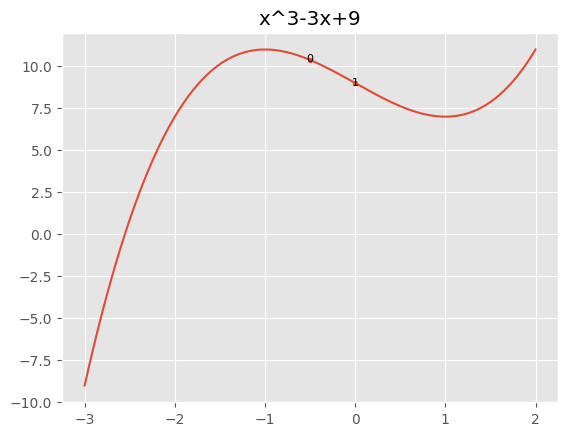

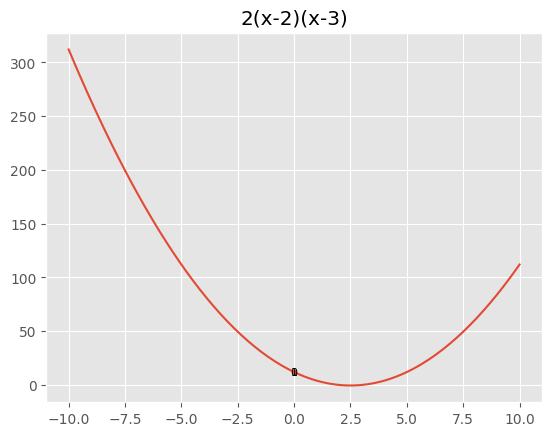

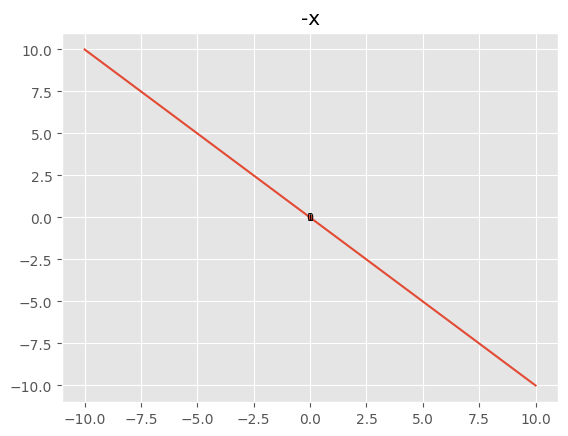

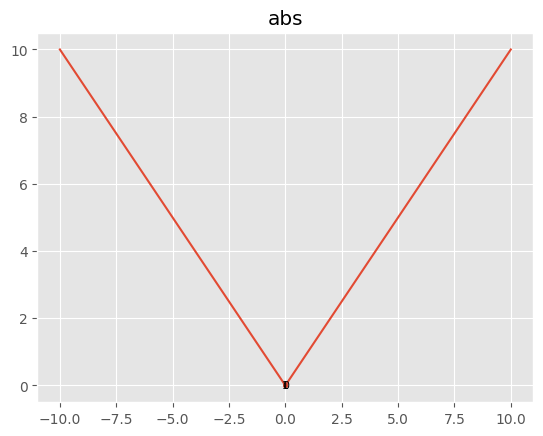

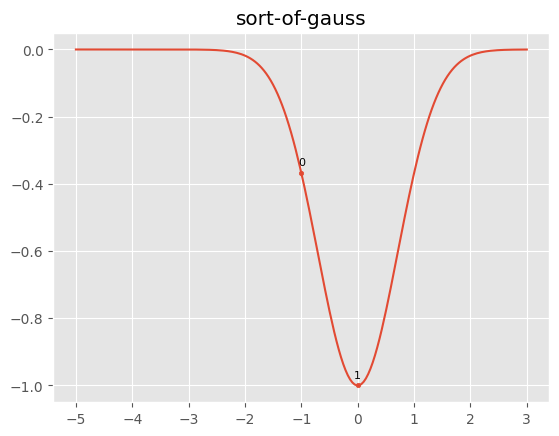

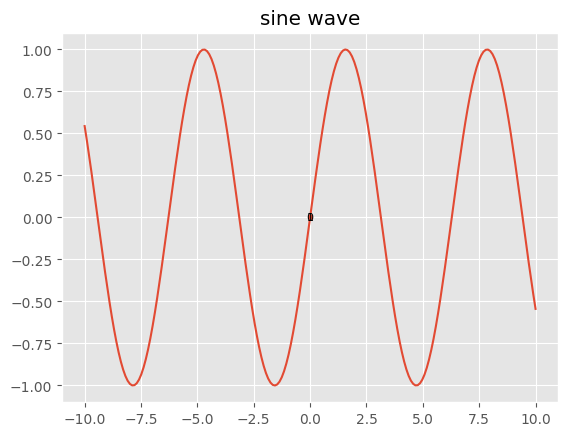

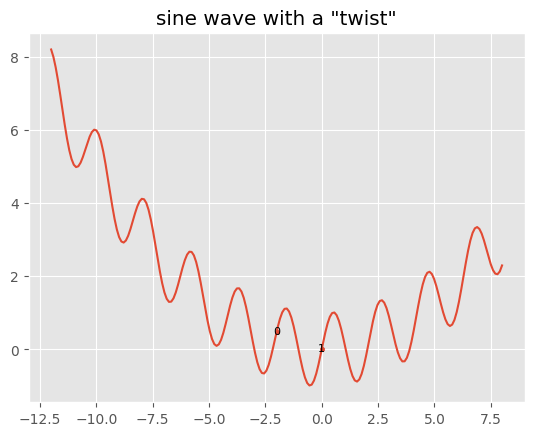

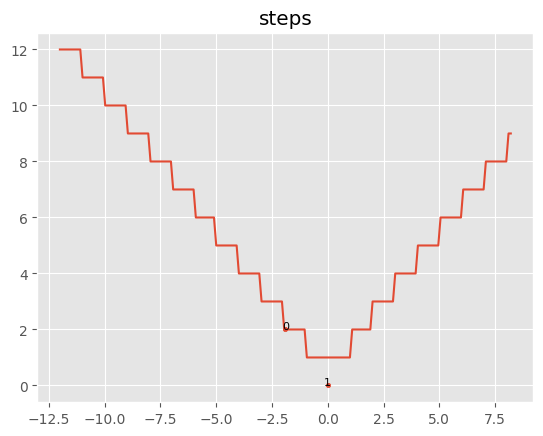

In [4]:
#You can test predefined functions and observe what happens
#(for methods you implement not bogus search)

# Later you can run predefined functions given in the file
from eco_hw1_helpers import functions
for f in functions:
    points, solution = bogus_search(f, max_steps)
    f.plot(points=points)

# Uniform search

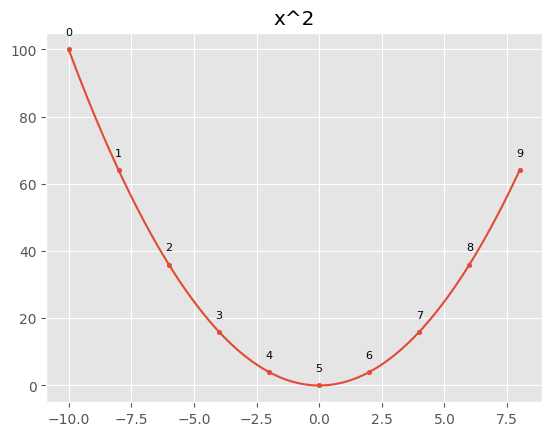

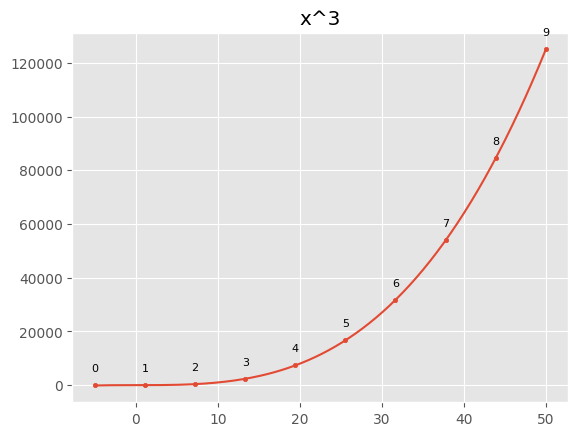

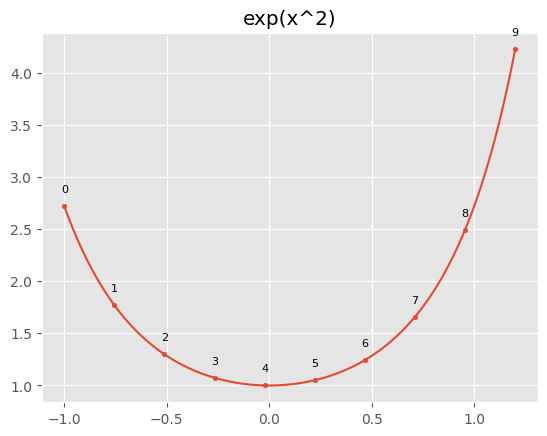

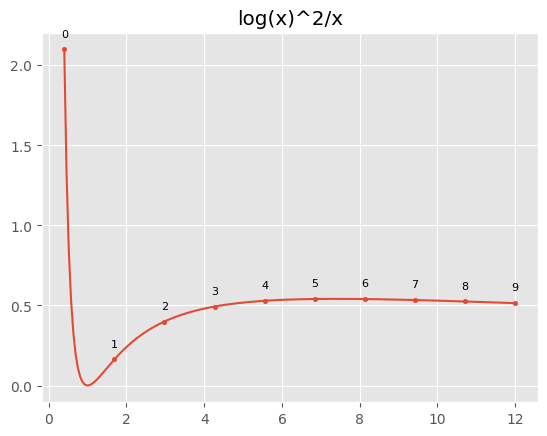

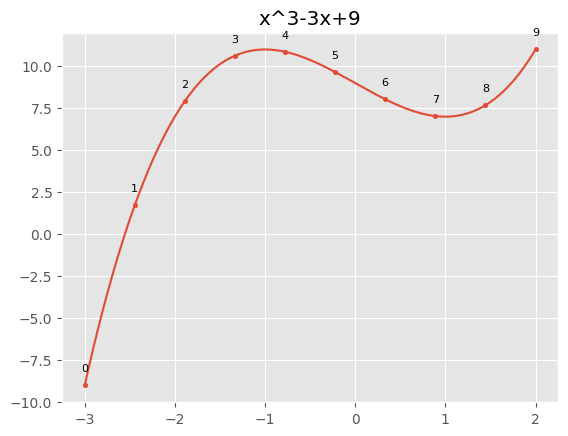

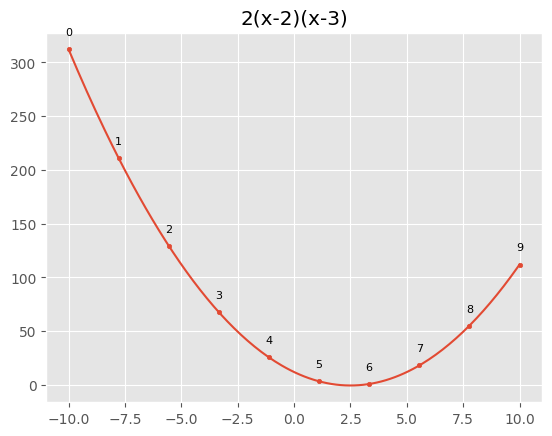

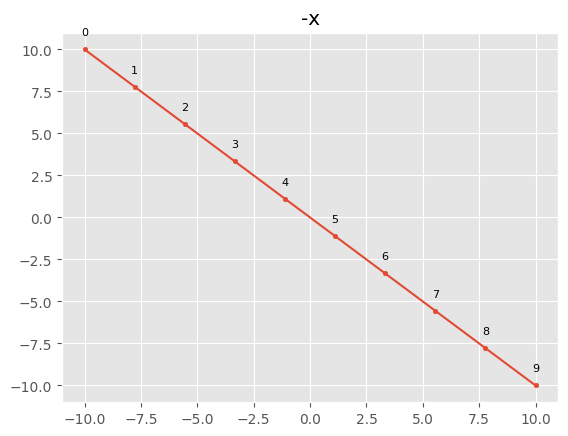

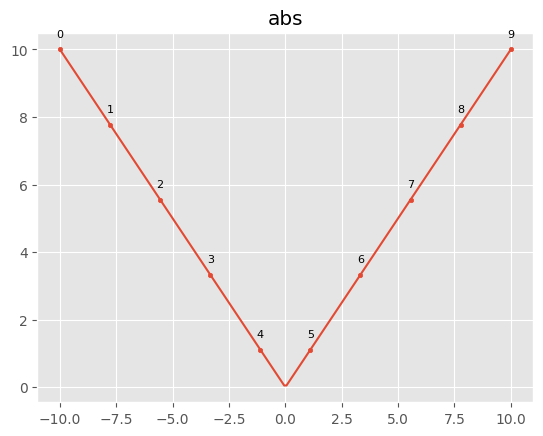

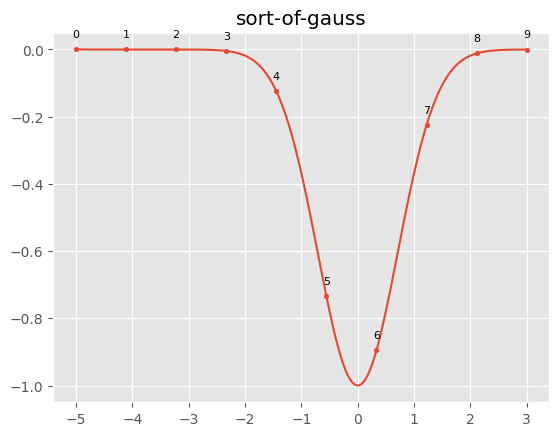

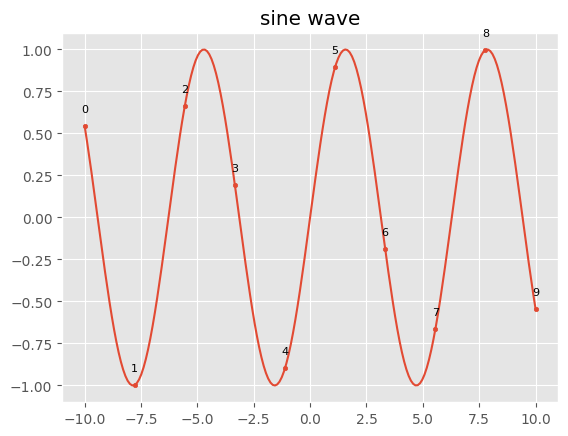

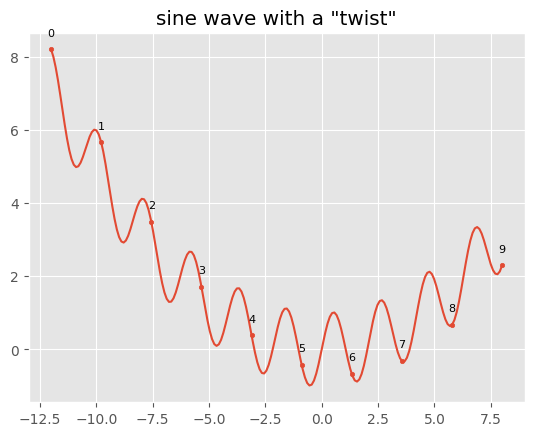

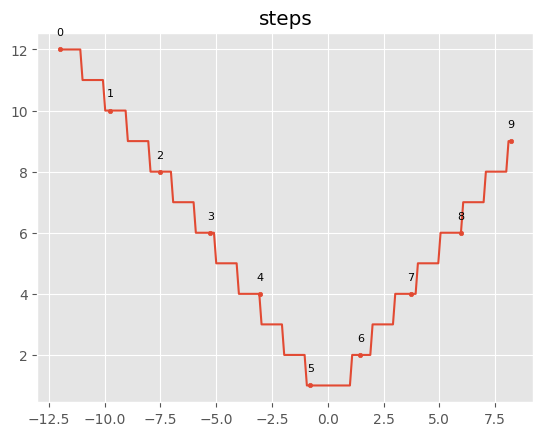

In [5]:
def uniform_search(function: Function, n: int):
    a, b = function.domain
    x_values = np.linspace(a, b, n)  # Generate n points uniformly in the domain
    y_values = [function.evaluate(x) for x in x_values]
    min_index = np.argmin(y_values)
    minimizer = x_values[min_index]

    return x_values.tolist(), minimizer

for f in functions:
    points, solution = uniform_search(f, max_steps)
    f.plot(points=points)

# Random search

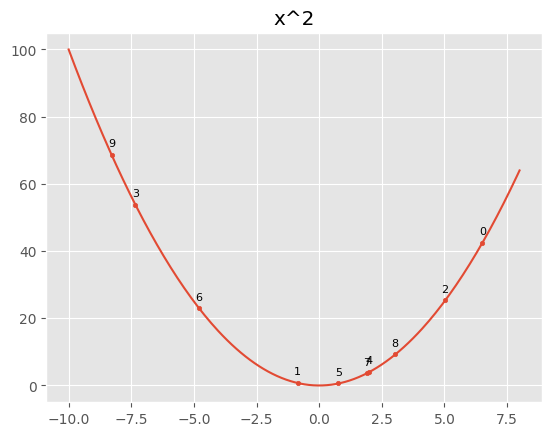

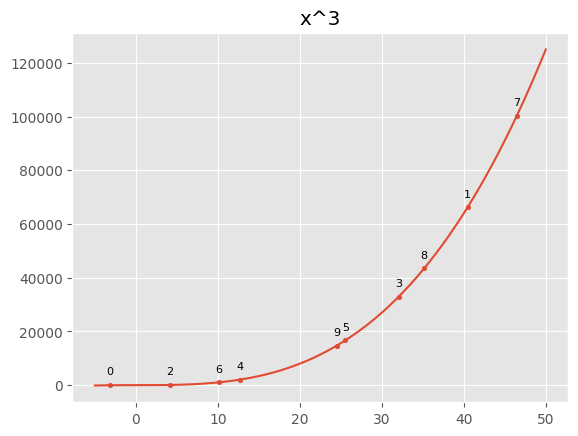

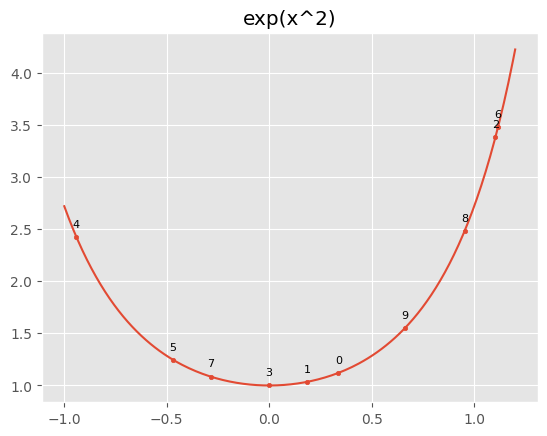

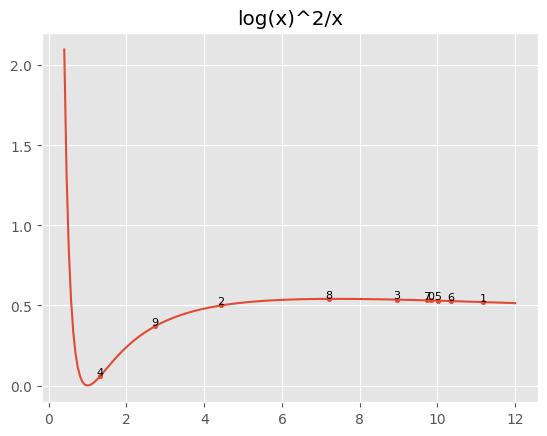

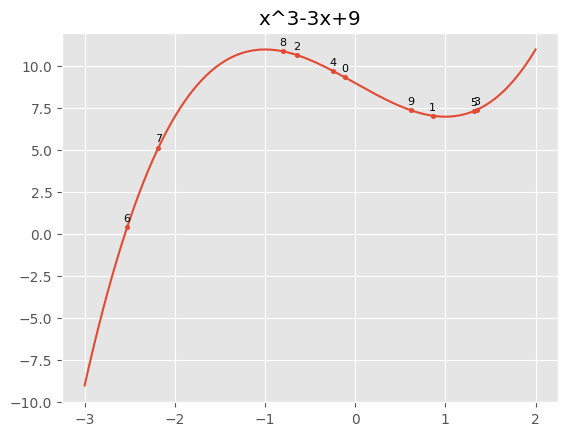

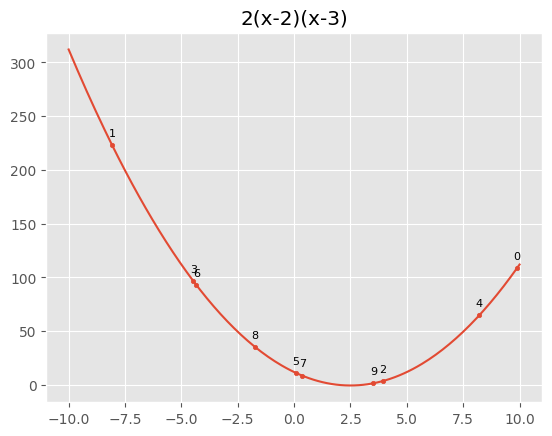

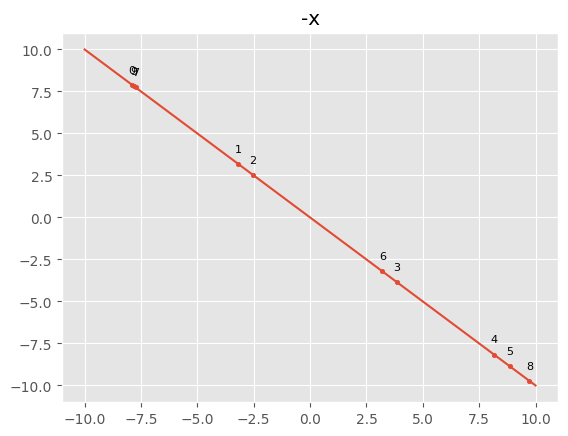

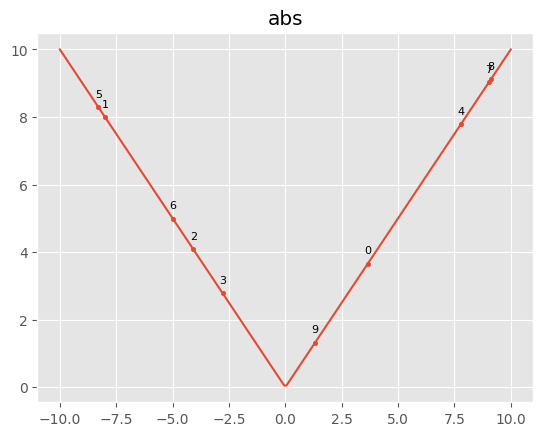

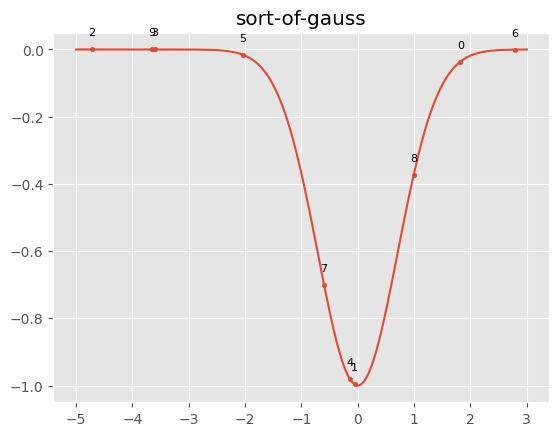

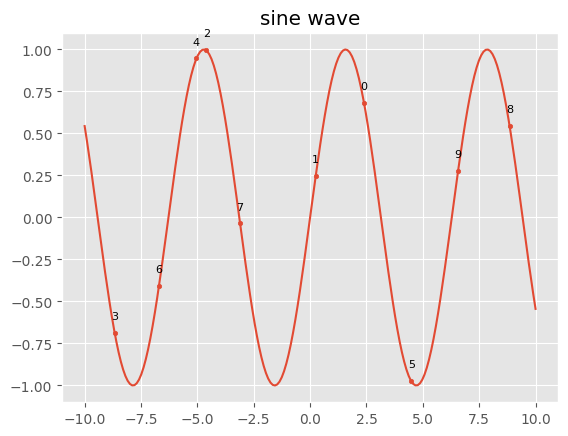

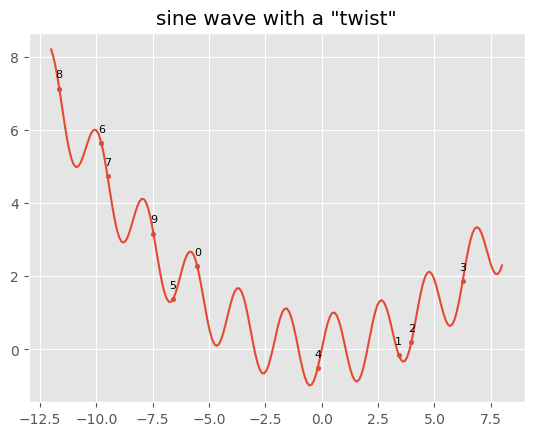

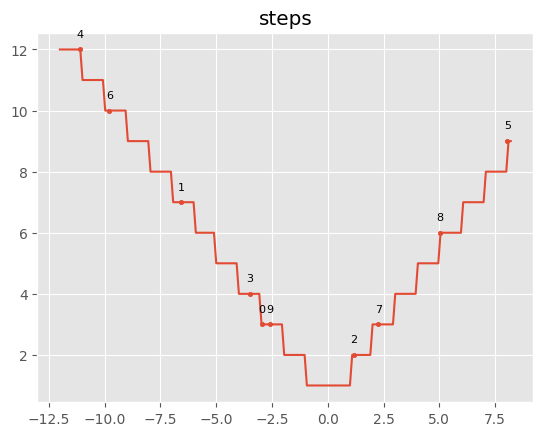

In [6]:
def random_search(function: Function, n: int):
    a, b = function.domain
    x_values = np.random.uniform(a, b, n)  # Generate n random points in the domain
    y_values = [function.evaluate(x) for x in x_values]
    min_index = np.argmin(y_values)
    minimizer = x_values[min_index]

    return x_values.tolist(), minimizer

for f in functions:
    points, solution = random_search(f, max_steps)
    f.plot(points=points)

# Dichotomous search


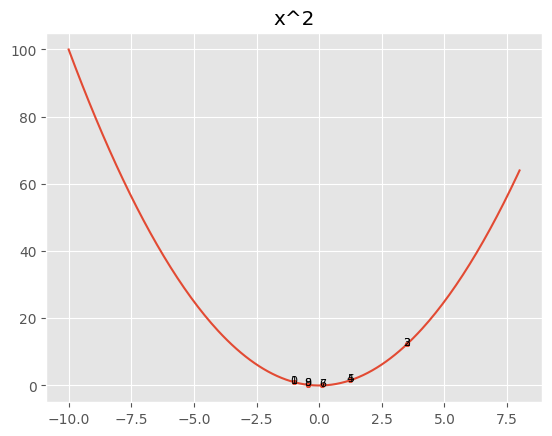

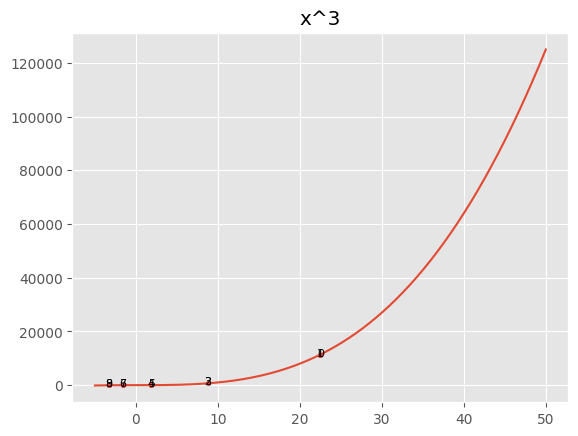

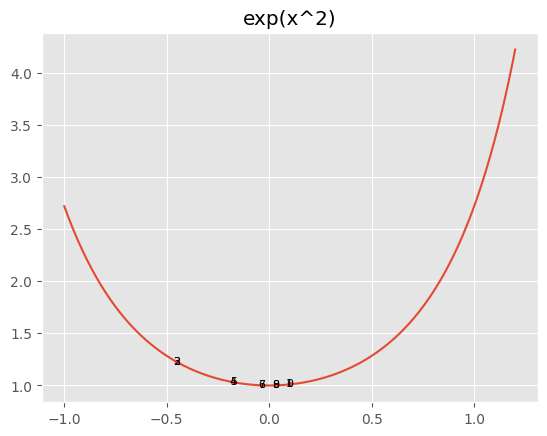

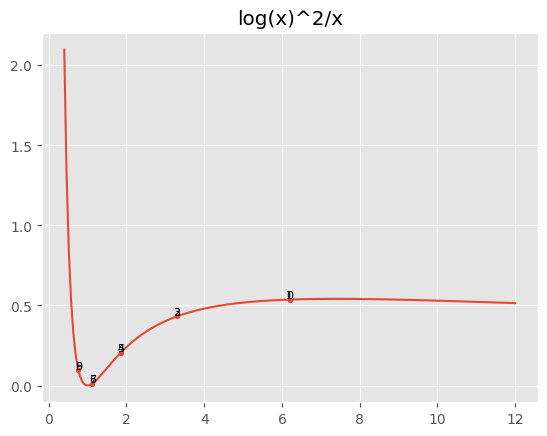

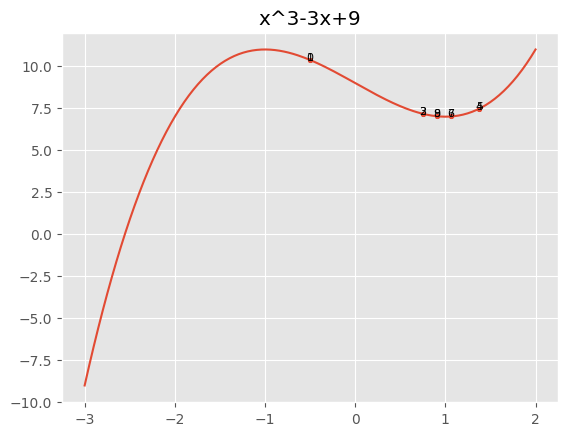

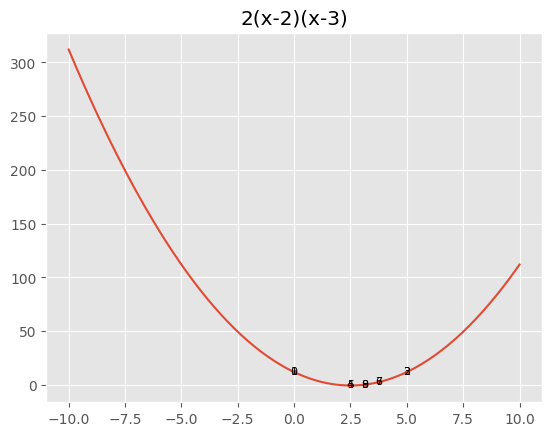

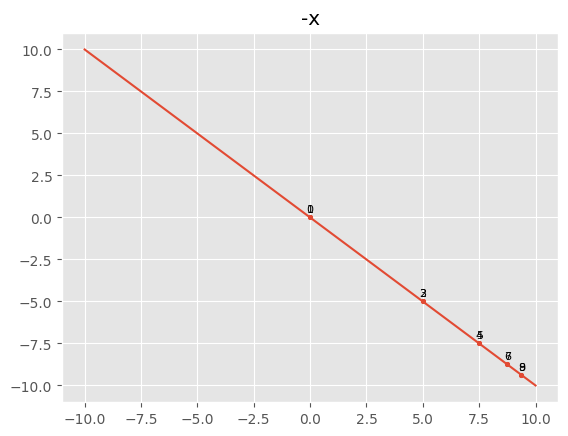

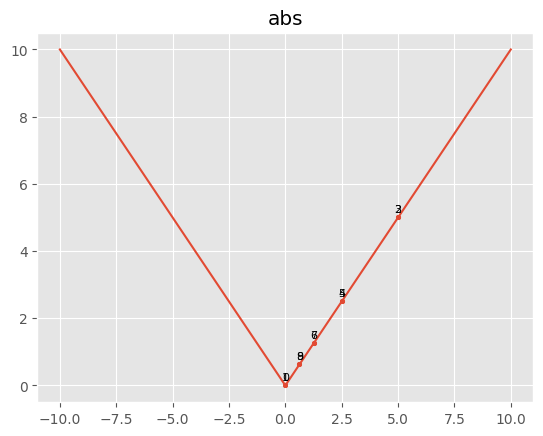

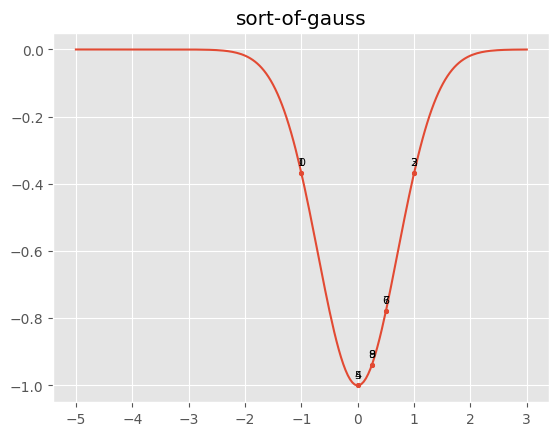

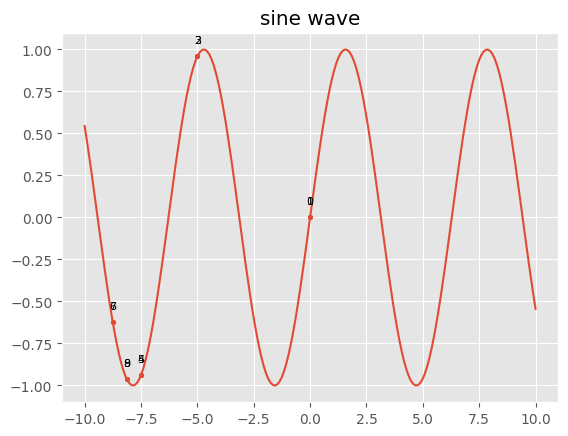

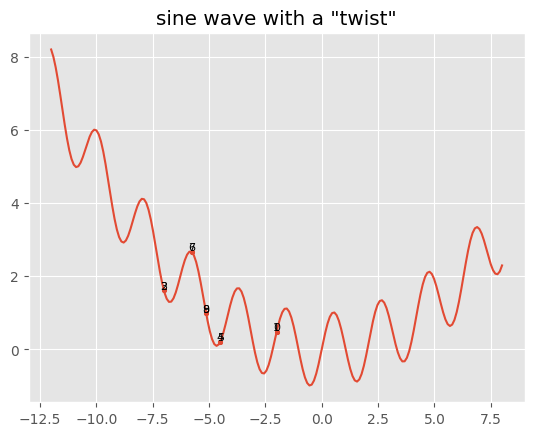

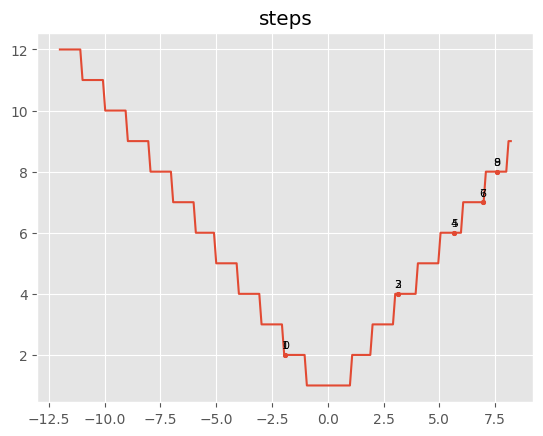

In [7]:
def dichotomous_search(function: Function, n: int):
    a, b = function.domain
    epsilon = 1e-5
    visited_points = []
    for _ in range(n // 2):  # Each iteration tests two points
        mid = (a + b) / 2
        x1, x2 = mid - epsilon, mid + epsilon
        visited_points.extend([x1, x2])
        if function.evaluate(x1) < function.evaluate(x2):
            b = x2
        else:
            a = x1
        if abs(b - a) < epsilon:
            break

    minimizer = (a + b) / 2
    return visited_points, minimizer

for f in functions:
    points, solution = dichotomous_search(f, max_steps)
    f.plot(points=points)


# Bisection search

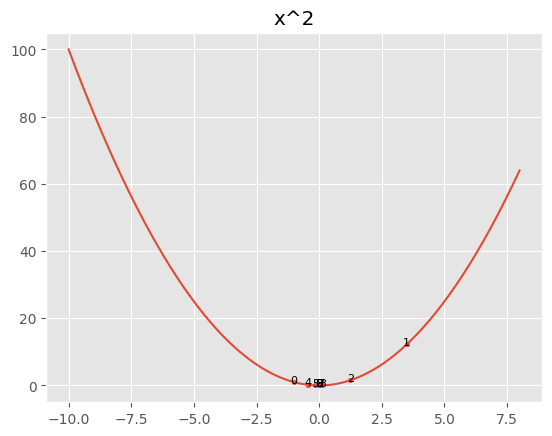

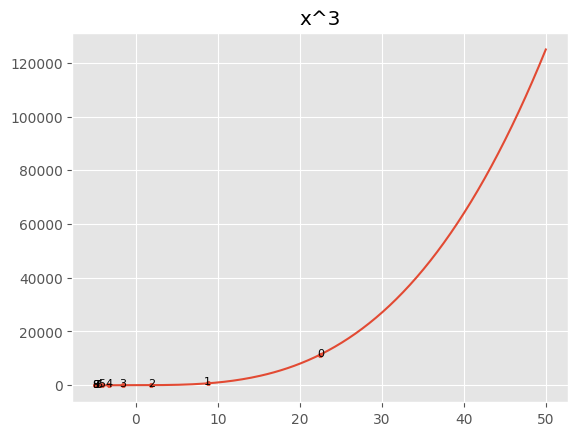

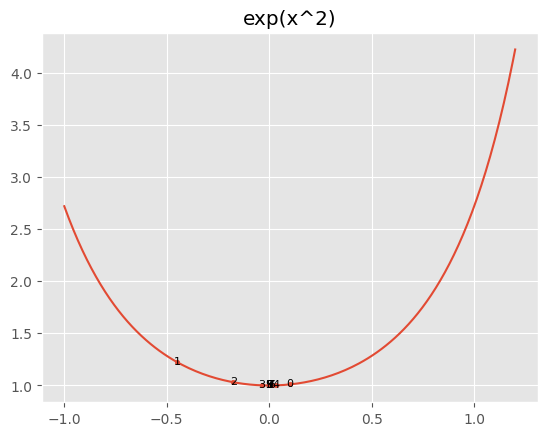

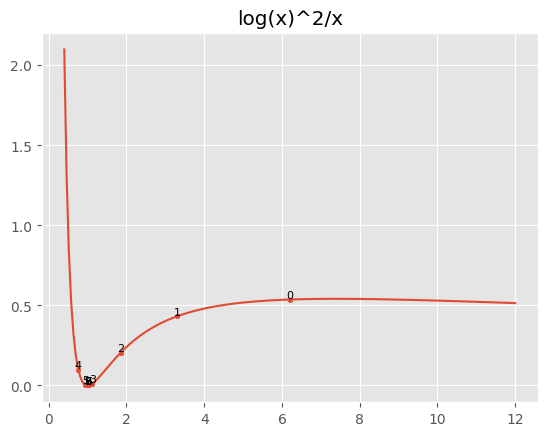

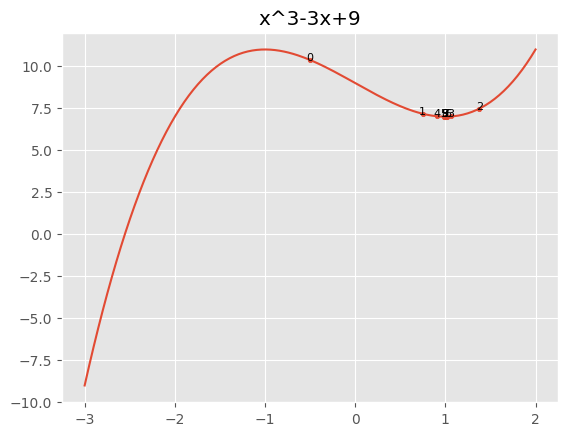

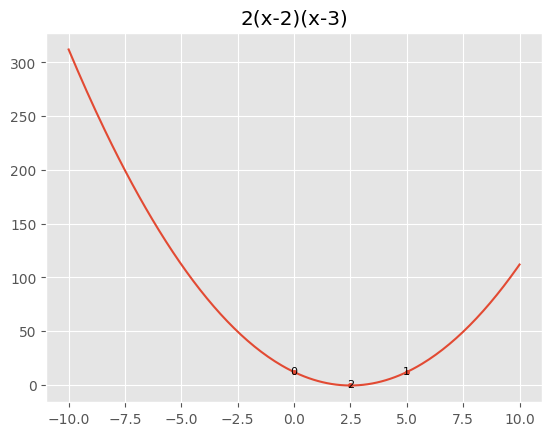

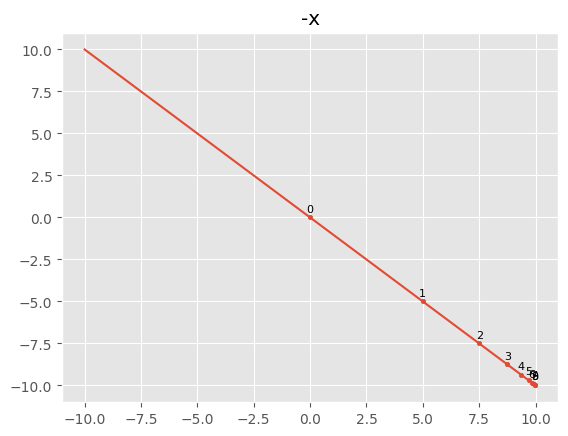

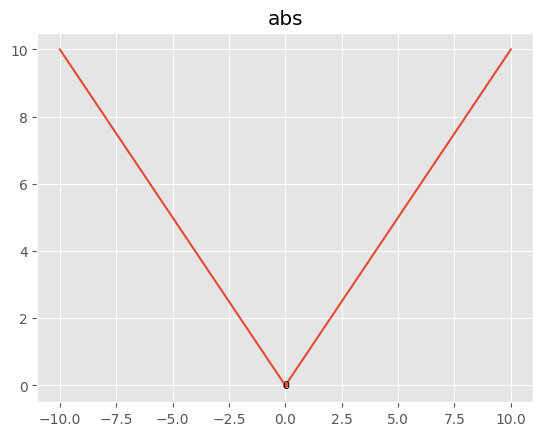

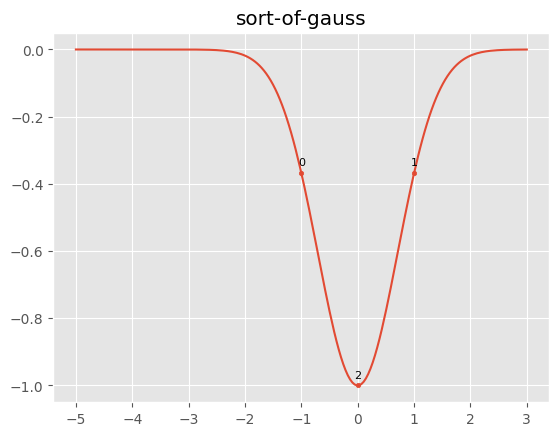

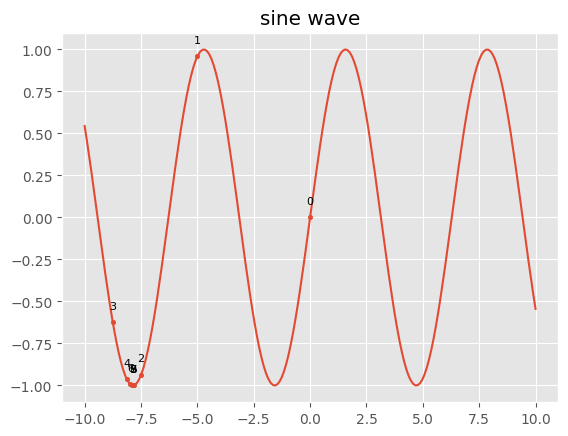

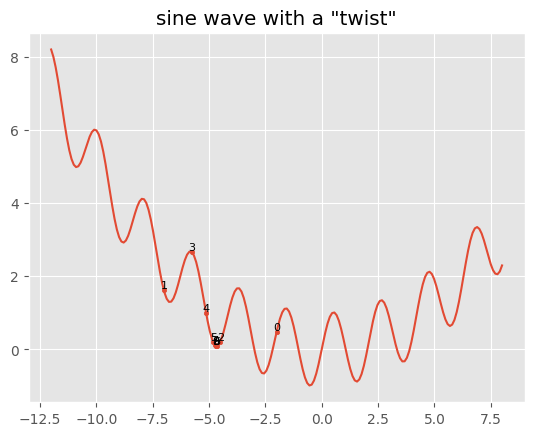

c:\Users\mikol\AppData\Local\Programs\Python\Python311\Lib\site-packages\autograd\tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


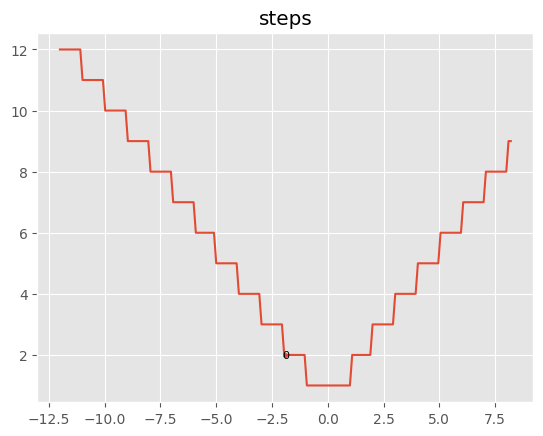

In [8]:
def bisection_search(function: Function, n: int):
    a, b = function.domain
    epsilon = 1e-5
    visited_points = []

    for _ in range(n):
        mid = (a + b) / 2
        visited_points.append(mid)
        derivative = function.evaluate_derivative(mid)
        if abs(derivative) < epsilon:
            break
        elif derivative > 0:
            b = mid
        else:
            a = mid
    minimizer = (a + b) / 2
    return visited_points, minimizer

for f in functions:
    points, solution = bisection_search(f, max_steps)
    f.plot(points=points)

# Golden-section search

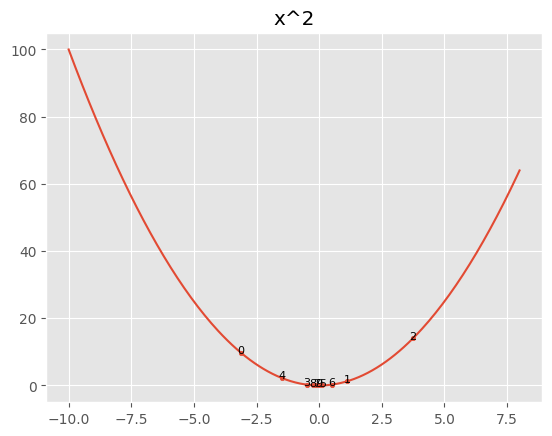

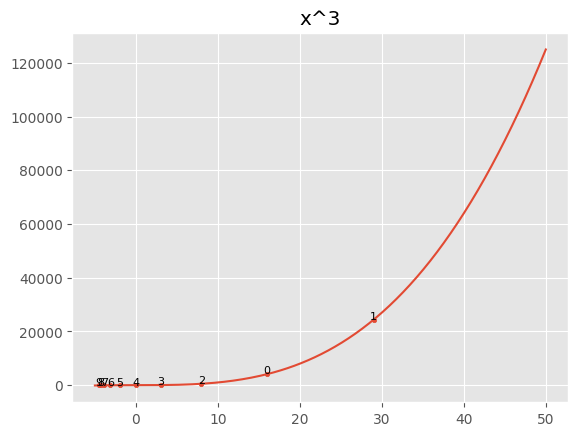

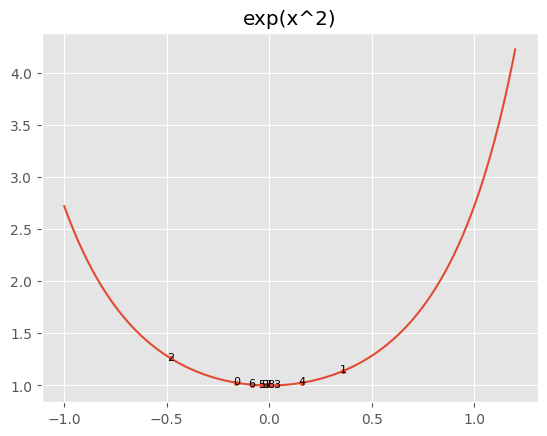

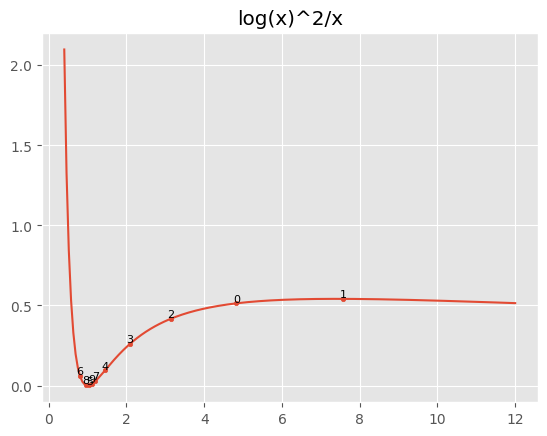

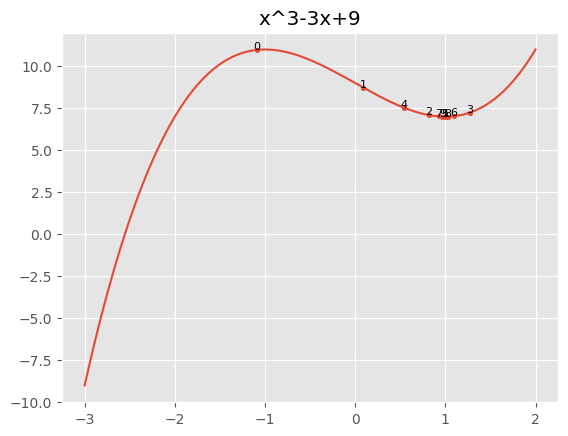

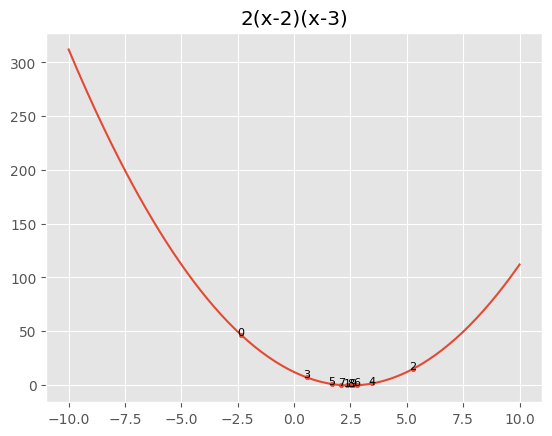

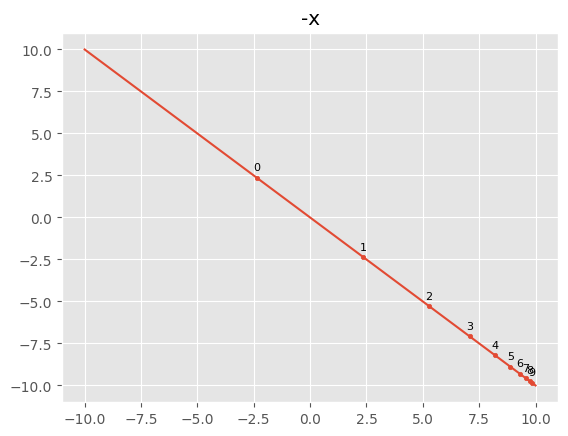

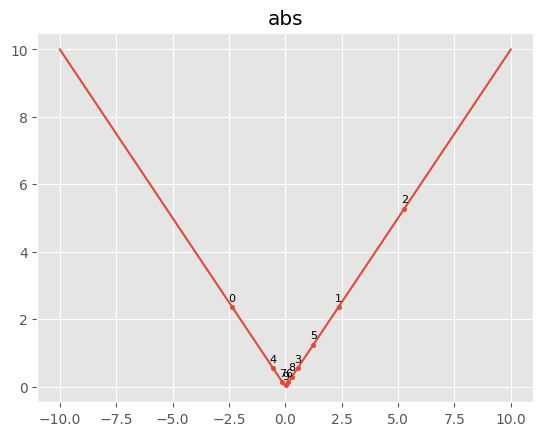

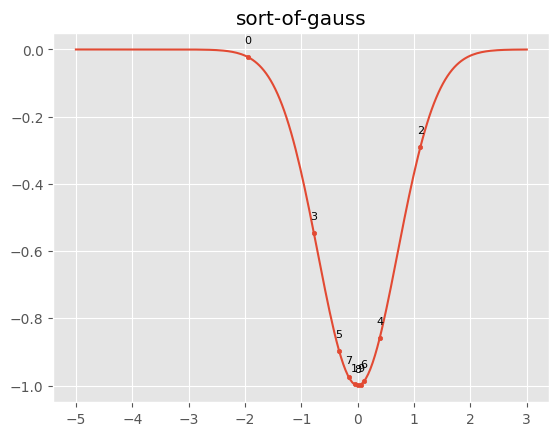

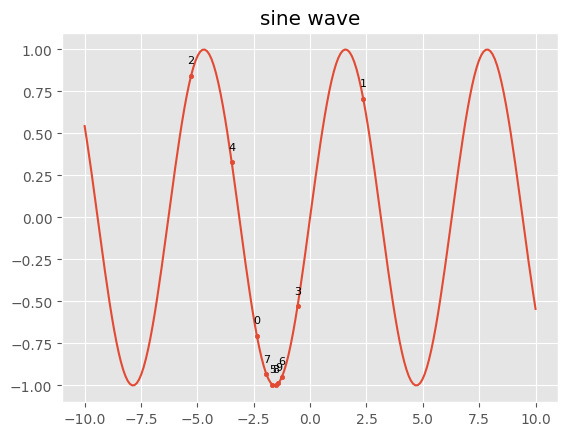

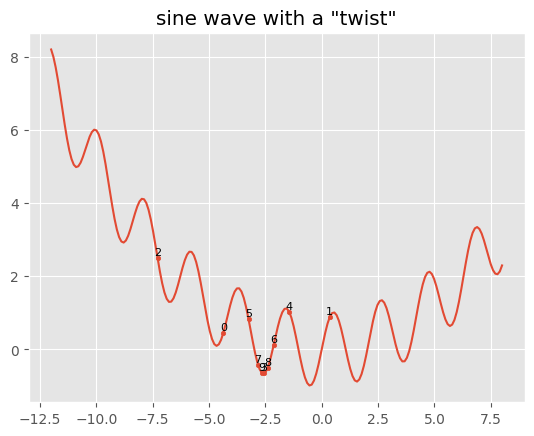

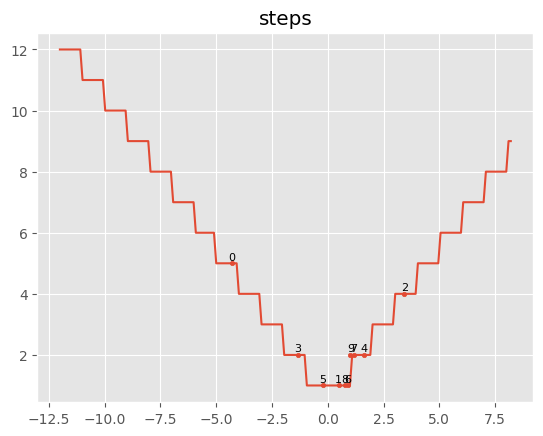

In [9]:
def golden_section_search(function: Function, n: int):
    a, b = function.domain
    phi = (1 + np.sqrt(5)) / 2  # Golden ratio
    resphi = 2 - phi  # 1 - (1 / phi)
    
    x1 = a + resphi * (b - a)
    x2 = b - resphi * (b - a)

    f_x1 = function.evaluate(x1)
    f_x2 = function.evaluate(x2)
    n-=2

    visited_points = [x1, x2]

    while n > 0 and abs(b - a) > 1e-5:
        if f_x1 < f_x2:
            b, x2, f_x2 = x2, x1, f_x1
            x1 = a + resphi * (b - a)
            f_x1 = function.evaluate(x1)
            visited_points.append(x1)
        else:
            a, x1, f_x1 = x1, x2, f_x2
            x2 = b - resphi * (b - a)
            f_x2 = function.evaluate(x2)
            visited_points.append(x2)
        n -= 1

    minimizer = (a + b) / 2
    return visited_points, minimizer

for f in functions:
    points, solution = golden_section_search(f, max_steps)
    f.plot(points=points)
